In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3
from sklearn.cluster import KMeans

In [2]:
df = pd.read_excel("OnlineRetail.xlsx")
dataset = df
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [69]:
dataset = df
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


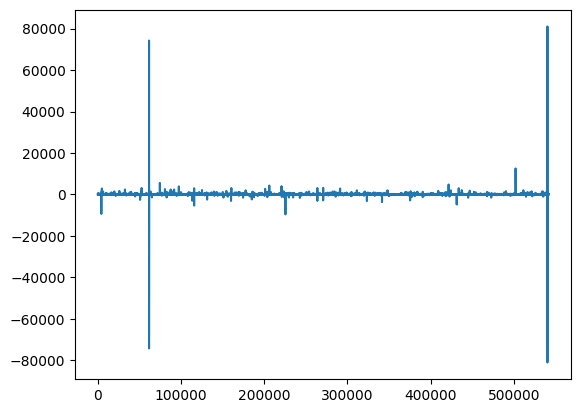

In [70]:
#plotting a line plot too se the relation between quantity and unit price
plt.plot(dataset["Quantity"])
plt.show()

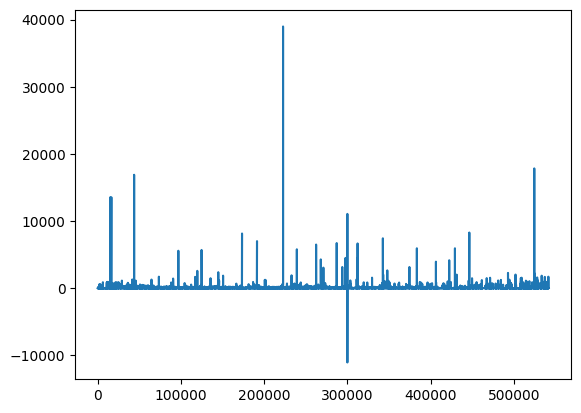

In [71]:
plt.plot(dataset["UnitPrice"])
plt.show()

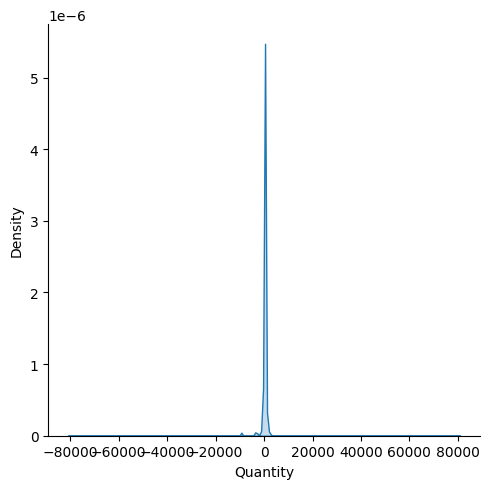

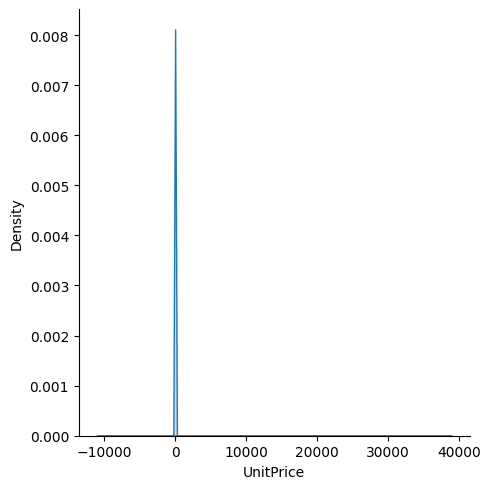

In [73]:
sns.displot(dataset, x="Quantity", kind='kde', fill=True)
sns.displot(dataset, x="UnitPrice", kind='kde', fill=True)

In [74]:
#as we can see the plot is not right and we got some negative values as well, so
#lets remove the negative values 1st and then plot the chart again
print("NEGATIVE VALUES IN QUANTITY COLUMN", dataset[dataset["Quantity"] <= 0]["Quantity"].count())
print("NEGATIVE VALUES IN UNIT PRICE COLUMN", dataset[dataset["UnitPrice"] <= 0]["UnitPrice"].count())


# so there are 8905 values that are negative, lets remove them

NEGATIVE VALUES IN QUANTITY COLUMN 10624
NEGATIVE VALUES IN UNIT PRICE COLUMN 2517


In [75]:
#lets remove them
dataset = dataset[dataset["Quantity"] > 0]
dataset = dataset[dataset["UnitPrice"] > 0]
print("NEGATIVE VALUES IN QUANTITY COLUMN", dataset[dataset["Quantity"] <= 0]["Quantity"].count())
print("NEGATIVE VALUES IN UNIT PRICE COLUMN", dataset[dataset["UnitPrice"] <= 0]["UnitPrice"].count())
# there are no negative values, so lets just plot it in the next cell


NEGATIVE VALUES IN QUANTITY COLUMN 0
NEGATIVE VALUES IN UNIT PRICE COLUMN 0


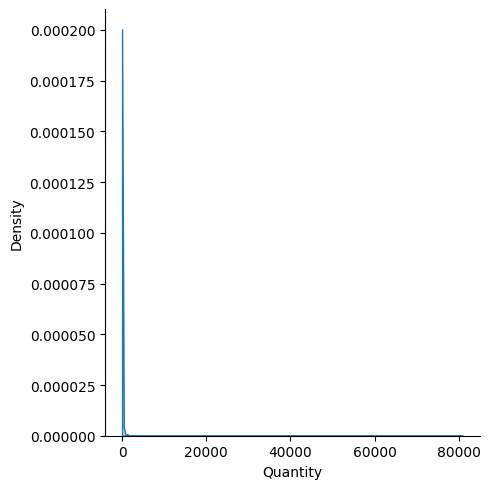

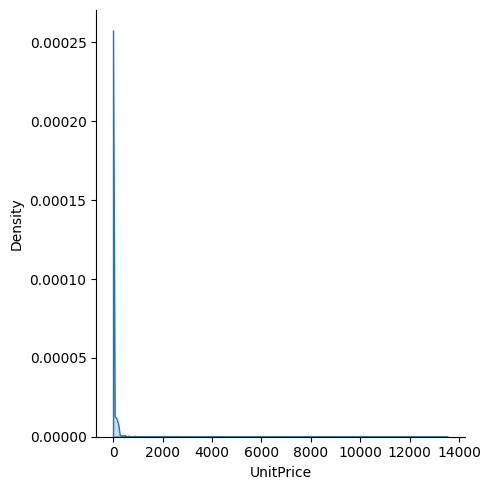

In [77]:
sns.displot(dataset, x="Quantity", kind='kde', fill=True)
sns.displot(dataset, x="UnitPrice", kind='kde', fill=True)

In [78]:
dataset.info()
# we can see the datatypes of the each column and there are no null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  object        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      530104 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 52.5+ MB


In [80]:
dataset.shape
# number of rows = 541909, columns = 

(530104, 8)

In [81]:
dataset.describe()
# we can see the count, mean and all other stuff

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [82]:
dataset.isna().sum()
# apart from Description and CustomerID we have no null values in any columns

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

In [84]:
# modify the dataset and remove the rows that contain all the null values
temp = dataset[~dataset["Description"].isna()]
dataset = temp
dataset.isna().sum()
# and no we can see there are no null values left apart from CustomerID

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

In [85]:
temp = dataset[~dataset["CustomerID"].isna()]
dataset = temp
dataset.isna().sum()
#no null values left at all

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [86]:
dataset.shape
# and now we can see signnificant amount of rows are excluded from the dataset


(397884, 8)

In [87]:
#DOING CORELATION

In [88]:
dataset.corr()

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.004563,-0.006232
UnitPrice,-0.004563,1.000000,-0.010873
CustomerID,-0.006232,-0.010873,1.000000


Text(0, 0.5, 'Total Revenue')

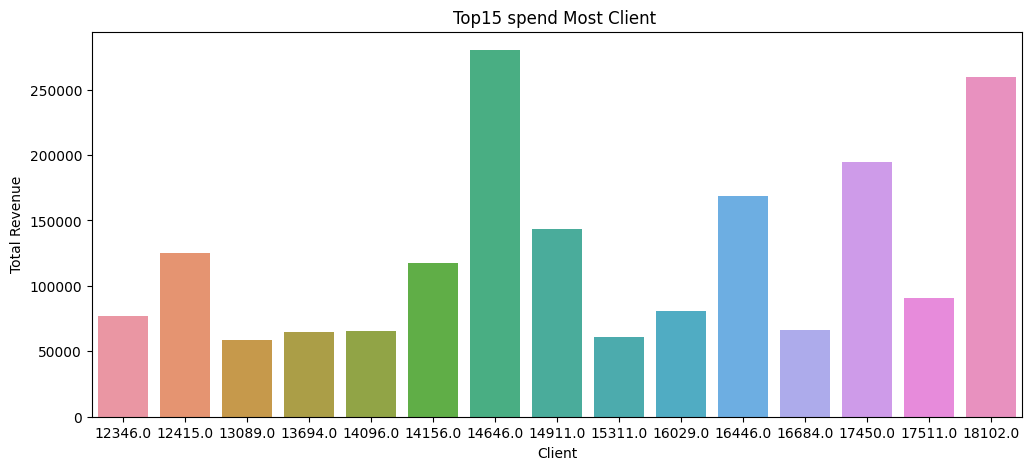

In [89]:
temp_data = dataset
temp_data['Revenue'] = temp_data['Quantity']*temp_data['UnitPrice']

temp=temp_data.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).reset_index()[:15]
plt.figure(figsize=(12,5))
sns.barplot(x='CustomerID', y='Revenue', data=temp)
plt.title("Top15 spend Most Client ")
plt.xlabel('Client')
plt.ylabel('Total Revenue')

In [ ]:
#REMOVING REDUNDANT VALUES

In [26]:
dataset.head()
#as we can see we dont need columns like InvoiceNo, StockID, Description, Description and Country so we will drop them

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [27]:
temp = dataset.drop(["InvoiceNo", "StockCode", "Description", "Country"], axis = 1) 
dataset2 = temp
dataset2.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue
0,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,6,2010-12-01 08:26:00,3.39,17850.0,20.34


In [ ]:
#DISTRIBUTION ANALYSIS

In [54]:
for column in dataset2.columns:
    if column != "InvoiceDate":
         print(dataset2[column].loc[dataset2[column].idxmax()])
         print(dataset2[column].loc[dataset2[column].idxmin()])


80995
1
8142.75
0.001
18287.0
12346.0
168469.6
0.001


In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# temp = dataset2
# temp = temp.drop(["InvoiceDate", "CustomerID"], axis=1)

# df_scaled = scaler.fit_transform(temp.to_numpy())
# df_scaled = pd.DataFrame(df_scaled, columns=["Quantity"	,"UnitPrice"])
 
# print("Scaled Dataset Using StandardScaler")
# df_scaled.head()
# dataset = df_scaled
# dataset.head()


In [ ]:
#BUILDING RFM MODEL

In [31]:
conn = sqlite3.connect("RFMdb")
cur = conn.cursor()
dataset2.to_sql("my_dataa", conn)

397884

In [32]:
#lets see if the data is loaded into the sql
df_Fact = pd.read_sql('SELECT * FROM my_dataa', conn)
df_Fact

,index,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue
0,0,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,1,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,2,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,3,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,4,6,2010-12-01 08:26:00,3.39,17850.0,20.34
...,...,...,...,...,...,...
397879,541904,12,2011-12-09 12:50:00,0.85,12680.0,10.20
397880,541905,6,2011-12-09 12:50:00,2.10,12680.0,12.60
397881,541906,4,2011-12-09 12:50:00,4.15,12680.0,16.60
397882,541907,4,2011-12-09 12:50:00,4.15,12680.0,16.60


In [33]:
#lets clean the data
cleanedd_data= pd.read_sql(''' SELECT CustomerID,
                   MAX(InvoiceDate) AS last_order_date,
                   COUNT(*) AS count_order,
                   SUM(unitprice*quantity) AS totalprice
            FROM my_dataa
            WHERE InvoiceDate NOT LIKE '%C%'
            AND CustomerID IS NOT NULL
            AND UnitPrice != 0
            GROUP BY CustomerID ''', conn)

cleanedd_data

,CustomerID,last_order_date,count_order,totalprice
0,12346.0,2011-01-18 10:01:00,1,77183.60
1,12347.0,2011-12-07 15:52:00,182,4310.00
2,12348.0,2011-09-25 13:13:00,31,1797.24
3,12349.0,2011-11-21 09:51:00,73,1757.55
4,12350.0,2011-02-02 16:01:00,17,334.40
...,...,...,...,...
4333,18280.0,2011-03-07 09:52:00,10,180.60
4334,18281.0,2011-06-12 10:53:00,7,80.82
4335,18282.0,2011-12-02 11:43:00,12,178.05
4336,18283.0,2011-12-06 12:02:00,756,2094.88


In [36]:
cleanedd_data.to_sql("cleanedd_data", conn)

4338

In [38]:
df_Fact = pd.read_sql(''' SELECT customerid,  rfm_recency, rfm_frequency, rfm_monetary,rfm_recency*100 + rfm_frequency*10 + rfm_monetary AS rfm_combined, TotalSpending
    FROM 
     ( SELECT customerid, 
             NTILE(4) OVER (ORDER BY last_order_date) AS rfm_recency,
             NTILE(4) OVER (ORDER BY count_order) AS rfm_frequency,
             NTILE(4) OVER (ORDER BY totalprice) AS rfm_monetary,
             totalprice AS TotalSpending
      FROM 
            cleanedd_data
            ) 
 ''', conn)

df_Fact


# df_Fact = pd.read_sql('SELECT * FROM cleanedd_data', conn)
# df_Fact



,customerid,rfm_recency,rfm_frequency,rfm_monetary,rfm_combined,TotalSpending
0,18074.0,1,1,2,112,489.60
1,13747.0,1,1,1,111,79.60
2,12791.0,1,1,1,111,192.60
3,17908.0,1,3,1,131,243.28
4,16583.0,1,1,1,111,233.45
...,...,...,...,...,...,...
4333,17581.0,4,4,4,444,11045.04
4334,13777.0,4,4,4,444,25977.16
4335,15804.0,4,4,4,444,4206.39
4336,13113.0,4,4,4,444,12245.96


In [39]:
def rfm_level(df_Fact):
    if ((df_Fact['rfm_recency'] >= 4) and (df_Fact['rfm_frequency'] >= 4) 
        and (df_Fact['rfm_monetary'] >= 4)):
        return 'Best Customers'
    elif ((df_Fact['rfm_recency'] >= 3) and (df_Fact['rfm_frequency'] >= 3)
          and (df_Fact['rfm_monetary'] >= 3)):
        return 'Loyal'
    elif ((df_Fact['rfm_recency'] >= 3) and (df_Fact['rfm_frequency'] >= 1)
          and (df_Fact['rfm_monetary'] >= 2)):
        return 'Potential Loyalist'
    elif ((df_Fact['rfm_recency'] >= 3) and (df_Fact['rfm_frequency'] >= 1)
          and (df_Fact['rfm_monetary'] >= 1)):
        return 'Promising'
    elif ((df_Fact['rfm_recency'] >= 2) and (df_Fact['rfm_frequency'] >= 2)
          and (df_Fact['rfm_monetary'] >= 2)):
        return 'Customers Needing Attention'
    elif ((df_Fact['rfm_recency'] >= 1) and (df_Fact['rfm_frequency'] >= 2)
          and (df_Fact['rfm_monetary'] >= 2)):
        return 'At Risk'
    elif ((df_Fact['rfm_recency'] >= 1) and (df_Fact['rfm_frequency'] >= 1)
          and (df_Fact['rfm_monetary'] >= 2)):
        return 'Hibernating'
    else:
        return 'Lost'

#Create a new variable rfm_level    

df_Fact['rfm_level'] = df_Fact.apply(rfm_level, axis=1)

df_Fact

,customerid,rfm_recency,rfm_frequency,rfm_monetary,rfm_combined,TotalSpending,rfm_level
0,18074.0,1,1,2,112,489.60,Hibernating
1,13747.0,1,1,1,111,79.60,Lost
2,12791.0,1,1,1,111,192.60,Lost
3,17908.0,1,3,1,131,243.28,Lost
4,16583.0,1,1,1,111,233.45,Lost
...,...,...,...,...,...,...,...
4333,17581.0,4,4,4,444,11045.04,Best Customers
4334,13777.0,4,4,4,444,25977.16,Best Customers
4335,15804.0,4,4,4,444,4206.39,Best Customers
4336,13113.0,4,4,4,444,12245.96,Best Customers


In [40]:
# Calculate total customers in each segment
rfm_agg = df_Fact.groupby('rfm_level').agg({'customerid':'count'})
print(rfm_agg)


                             customerid
rfm_level                              
At Risk                             439
Best Customers                      441
Customers Needing Attention         712
Hibernating                         242
Lost                                777
Loyal                               855
Potential Loyalist                  564
Promising                           308


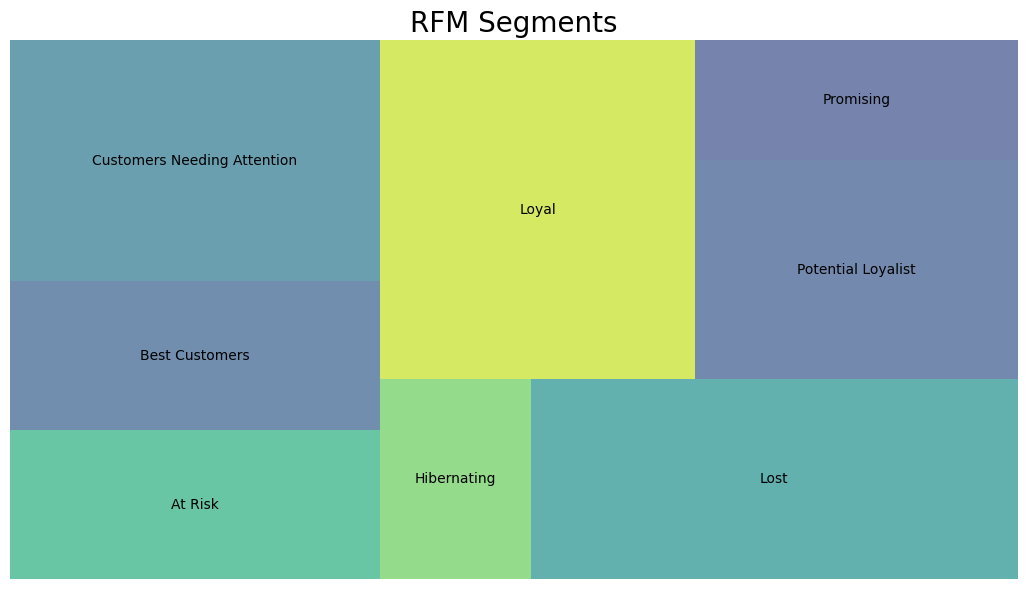

In [41]:
import squarify
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(13, 7)
squarify.plot(sizes=rfm_agg['customerid'], 
              label=['At Risk',
                     'Best Customers',
                     'Customers Needing Attention',
                     'Hibernating',
                     'Lost', 
                     'Loyal', 
                     'Potential Loyalist',
                     'Promising'], alpha=0.7)
plt.title("RFM Segments",fontsize=20)
plt.axis('off')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_2196\1046064142.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = rfm_recency, y = rfm_frequency,  color = 'blue', palette = 'Accent_r')
C:\Users\HP\AppData\Local\Temp\ipykernel_2196\1046064142.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = rfm_recency, y = rfm_monetary, color = 'yellow', palette = 'Accent_r')
C:\Users\HP\AppData\Local\Temp\ipykernel_2196\1046064142.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = rfm_monetary, y = rfm_frequency, color = 'red', palette = 'Accent_r')


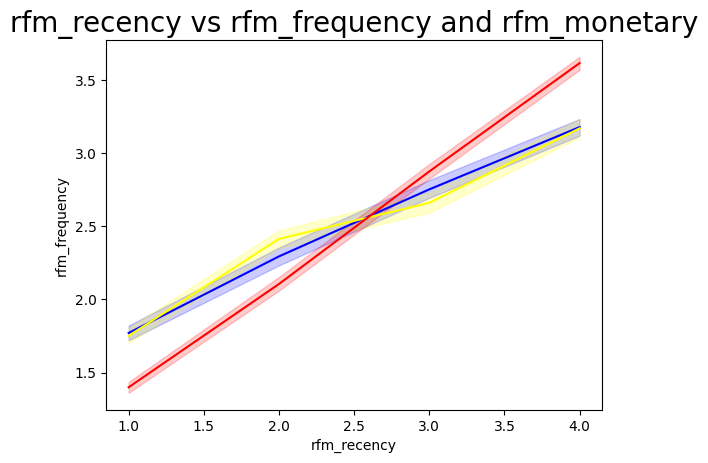

In [45]:
rfm_recency = df_Fact['rfm_recency']
rfm_frequency = df_Fact['rfm_frequency']
rfm_monetary = df_Fact['rfm_monetary']
sns.lineplot(x = rfm_recency, y = rfm_frequency,  color = 'blue', palette = 'Accent_r')
sns.lineplot(x = rfm_recency, y = rfm_monetary, color = 'yellow', palette = 'Accent_r')
sns.lineplot(x = rfm_monetary, y = rfm_frequency, color = 'red', palette = 'Accent_r')
plt.title('rfm_recency vs rfm_frequency and rfm_monetary', fontsize = 20)
plt.show()

In [46]:
df_Fact

,customerid,rfm_recency,rfm_frequency,rfm_monetary,rfm_combined,TotalSpending,rfm_level
0,18074.0,1,1,2,112,489.60,Hibernating
1,13747.0,1,1,1,111,79.60,Lost
2,12791.0,1,1,1,111,192.60,Lost
3,17908.0,1,3,1,131,243.28,Lost
4,16583.0,1,1,1,111,233.45,Lost
...,...,...,...,...,...,...,...
4333,17581.0,4,4,4,444,11045.04,Best Customers
4334,13777.0,4,4,4,444,25977.16,Best Customers
4335,15804.0,4,4,4,444,4206.39,Best Customers
4336,13113.0,4,4,4,444,12245.96,Best Customers


In [ ]:
#APPYING K MEANS

Text(0, 0.5, 'rfm_monetary')

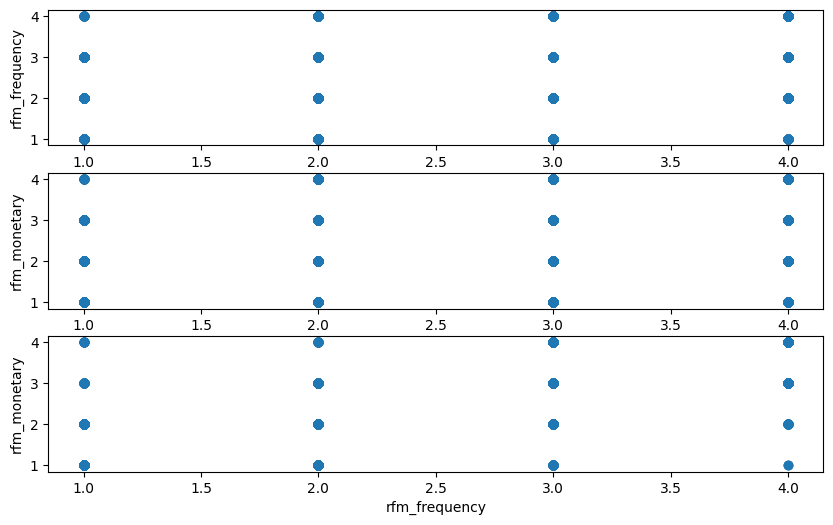

In [47]:
df1=df_Fact[["rfm_recency","rfm_frequency","rfm_monetary","rfm_combined"]]
X=df1[["rfm_recency","rfm_frequency","rfm_monetary"]]
X.head()



fig, ax = plt.subplots(3, figsize=(10, 6))
ax[0].scatter(x = X["rfm_recency"], y = X['rfm_frequency'])
ax[0].set_xlabel("rfm_recency")
ax[0].set_ylabel("rfm_frequency")

ax[1].scatter(x = X['rfm_recency'], y = X['rfm_monetary'])
ax[1].set_xlabel("rfm_recency")
ax[1].set_ylabel("rfm_monetary")

ax[2].scatter(x = X['rfm_frequency'], y = X['rfm_monetary'])
ax[2].set_xlabel("rfm_frequency")
ax[2].set_ylabel("rfm_monetary")


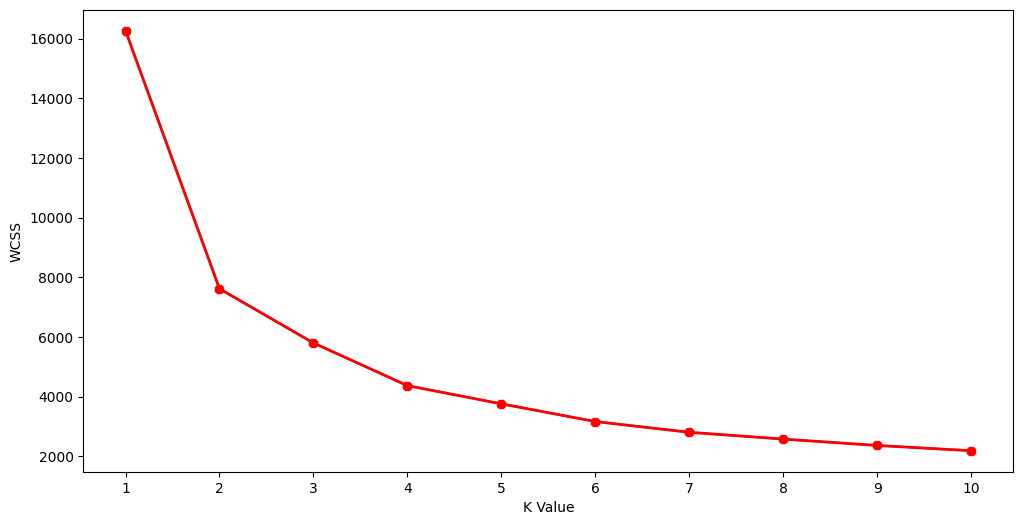

In [48]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [49]:
km1=KMeans(n_clusters=4)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
df1["label"] = y
#The new dataframe with the clustering done
df1.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_2196\3844746349.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["label"] = y


,rfm_recency,rfm_frequency,rfm_monetary,rfm_combined,label
0,1,1,2,112,2
1,1,1,1,111,2
2,1,1,1,111,2
3,1,3,1,131,2
4,1,1,1,111,2


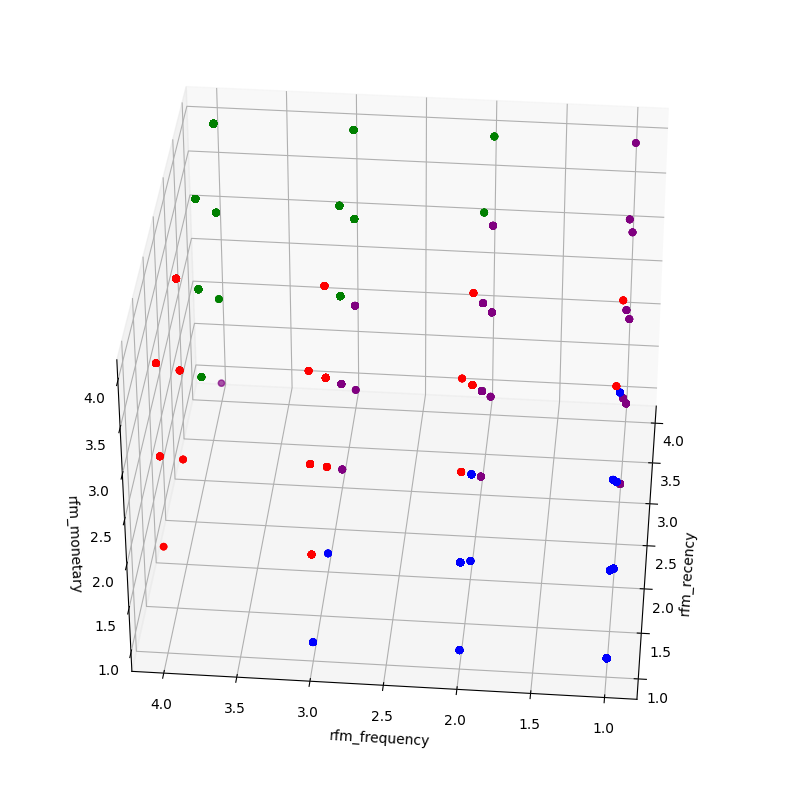

In [50]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1.rfm_recency[df1.label == 0], df1["rfm_frequency"][df1.label == 0], df1["rfm_monetary"][df1.label == 0], c='purple')
ax.scatter(df1.rfm_recency[df1.label == 1], df1["rfm_frequency"][df1.label == 1], df1["rfm_monetary"][df1.label == 1], c='red')
ax.scatter(df1.rfm_recency[df1.label == 2], df1["rfm_frequency"][df1.label == 2], df1["rfm_monetary"][df1.label == 2], c='blue')
ax.scatter(df1.rfm_recency[df1.label == 3], df1["rfm_frequency"][df1.label == 3], df1["rfm_monetary"][df1.label == 3], c='green')
ax.view_init(35, 185)
plt.xlabel("rfm_recency")
plt.ylabel("rfm_frequency")
ax.set_zlabel('rfm_monetary')
plt.show()